In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('preprocessed_fake_review_data.csv')
df.head()

,label,text
0,1,love well made sturdi comfort love veri pretti
1,1,love great upgrad origin mine coupl year
2,1,thi pillow save back love look feel pillow
3,1,miss inform use great product price
4,1,veri nice set good qualiti set two month


# split data


In [4]:
X = df['text']
y = df['label']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(X)

In [6]:
print(X.shape)

(23583, 5000)


In [7]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 533835 stored elements and shape (23583, 5000)>
  Coords	Values
  (0, 2567)	0.47694307255792145
  (0, 4852)	0.2660668723228189
  (0, 2592)	0.3302808736752062
  (0, 4229)	0.4000384387543704
  (0, 836)	0.3707106742989215
  (0, 4727)	0.39236947316980525
  (0, 3275)	0.37581552586336675
  (1, 2567)	0.2185639810675061
  (1, 1898)	0.19298103971227248
  (1, 4671)	0.5426851129408
  (1, 3006)	0.43017213095846585
  (1, 2720)	0.4825584710081162
  (1, 974)	0.3401726738864006
  (1, 4972)	0.2947079646529125
  (2, 2567)	0.16680334007056036
  (2, 4419)	0.16812508098417167
  (2, 3155)	0.7935106867634724
  (2, 3709)	0.3606605107200719
  (2, 279)	0.26595344252568537
  (2, 2555)	0.20968102687423112
  (2, 1576)	0.26358684007813266
  (3, 1898)	0.21795201976443218
  (3, 2733)	0.5692798296208788
  (3, 2205)	0.6203506584712357
  (3, 4688)	0.22079189367761243
  :	:
  (23581, 1854)	0.0833693654294897
  (23581, 1848)	0.09379831970270168
  (23581, 3362)	

# Train and text split:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Model (Start with Logistic Regression)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

# predict

In [10]:
y_pred = model.predict(X_test)

# Check accuracy

In [11]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.873436506253975
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2353
           1       0.89      0.85      0.87      2364

    accuracy                           0.87      4717
   macro avg       0.87      0.87      0.87      4717
weighted avg       0.87      0.87      0.87      4717



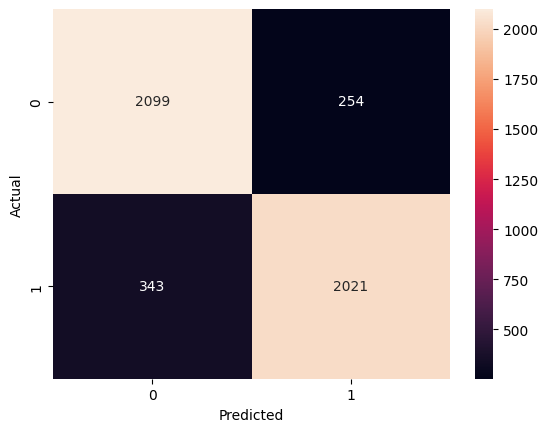

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# example and predict

In [13]:
def predict_review(review_text):

    review = [review_text]
    review_vector = vectorizer.transform(review)

    prediction = model.predict(review_vector)
    probability = model.predict_proba(review_vector)

    if prediction[0] == 1:
        print("FAKE Review")
        print("Confidence:", probability[0][1])
    else:
        print("REAL Review")
        print("Confidence:", probability[0][0])


predict_review("This product is amazing and works perfectly!")
predict_review("Worst product ever. Totally useless and waste of money.")

FAKE Review
Confidence: 0.6597809609195879
REAL Review
Confidence: 0.590975611696912
